In [3]:
import numpy as np
import pandas as pd
from scipy import stats as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
from datetime import datetime
from scipy import stats
import seaborn as sns

In [4]:
dog_rates = pd.read_csv('dog_rates_tweets.csv', parse_dates=True)

In [5]:
contain = r'(\d+(\.\d+)?)/10'

In [6]:
bool_contain = dog_rates[dog_rates['text'].str.contains(contain)].copy()

In [7]:
bool_contain['rating'] = pd.to_numeric(bool_contain.text.str.extract(contain)[0], downcast='float')

In [8]:
bool_contain = bool_contain[bool_contain.rating <= 25]
bool_contain = bool_contain[bool_contain.rating >=0]

In [9]:
bool_contain['created_at'] = pd.to_datetime(bool_contain['created_at'], format='%Y-%m-%d %H:%M:%S')

In [10]:
def to_timestamp(d):
    return d.timestamp()
bool_contain['timestamp'] = bool_contain['created_at'].apply(to_timestamp)
fit = stats.linregress(bool_contain.timestamp,bool_contain.rating)
slope = fit.slope
intercept = fit.intercept

In [11]:
bool_contain['prediction'] = bool_contain.timestamp*slope + intercept
bool_contain

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,12.624973
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,12.622373
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,12.620951
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,12.613110
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,12.610619
...,...,...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0,1.550190e+09,13.183015
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0,1.550077e+09,13.180420
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0,1.549578e+09,13.168949
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0,1.549578e+09,13.168949


In [12]:
fit.slope, fit.intercept

(2.2983031752244575e-08, -22.44505872628138)

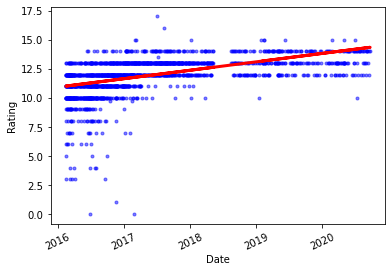

In [13]:
plt.xticks(rotation=25)
plt.plot(bool_contain['created_at'].values, bool_contain['rating'], 'b.' , alpha= 0.5 ) 
plt.plot(bool_contain['created_at'].values, slope*bool_contain['timestamp']+intercept, 'r-' , linewidth= 3 )
plt.xlabel("Date")
plt.ylabel("Rating")
plt.show()

In [14]:
fit.pvalue

3.793798773104138e-121

In [15]:
bool_contain['residuals'] = bool_contain['rating'] - bool_contain['prediction']

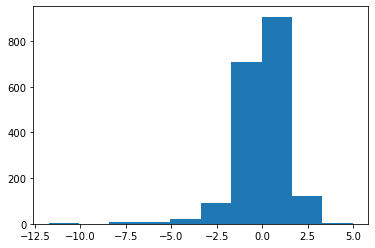

In [16]:
plt.hist(bool_contain['residuals'])
plt.show()